In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Enhanced sample dataset
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2025-01-01', periods=200, freq='D')
data = {
    'Date': dates,
    'Sales_Amount': np.random.normal(500, 100, 200),
    'Discount_Percent': np.random.uniform(0, 20, 200),
    'Customer_Segment': np.random.choice(['New', 'Returning', 'Loyal'], 200),
    'Store_ID': np.random.choice(['S001', 'S002', 'S003', 'S004'], 200),
    'Promotion_Active': np.random.choice([True, False], 200, p=[0.6, 0.4]),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 200)
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region
Date,,,,,,
2025-01-01,549.671415,17.547461,Returning,S003,True,North
2025-01-02,486.173570,14.815372,New,S004,False,South
2025-01-03,564.768854,13.940315,Loyal,S003,True,North
2025-01-04,652.302986,14.049682,New,S003,True,South
2025-01-05,476.584663,7.189823,New,S001,True,East


Group df by Region and calculate the mean Sales_Amount for each region.

In [4]:
df_grouped = df.groupby('Region').agg({
    'Sales_Amount': 'mean'
})

df_grouped

,Sales_Amount
Region,
East,479.349605
North,497.366858
South,510.124330
West,492.819024


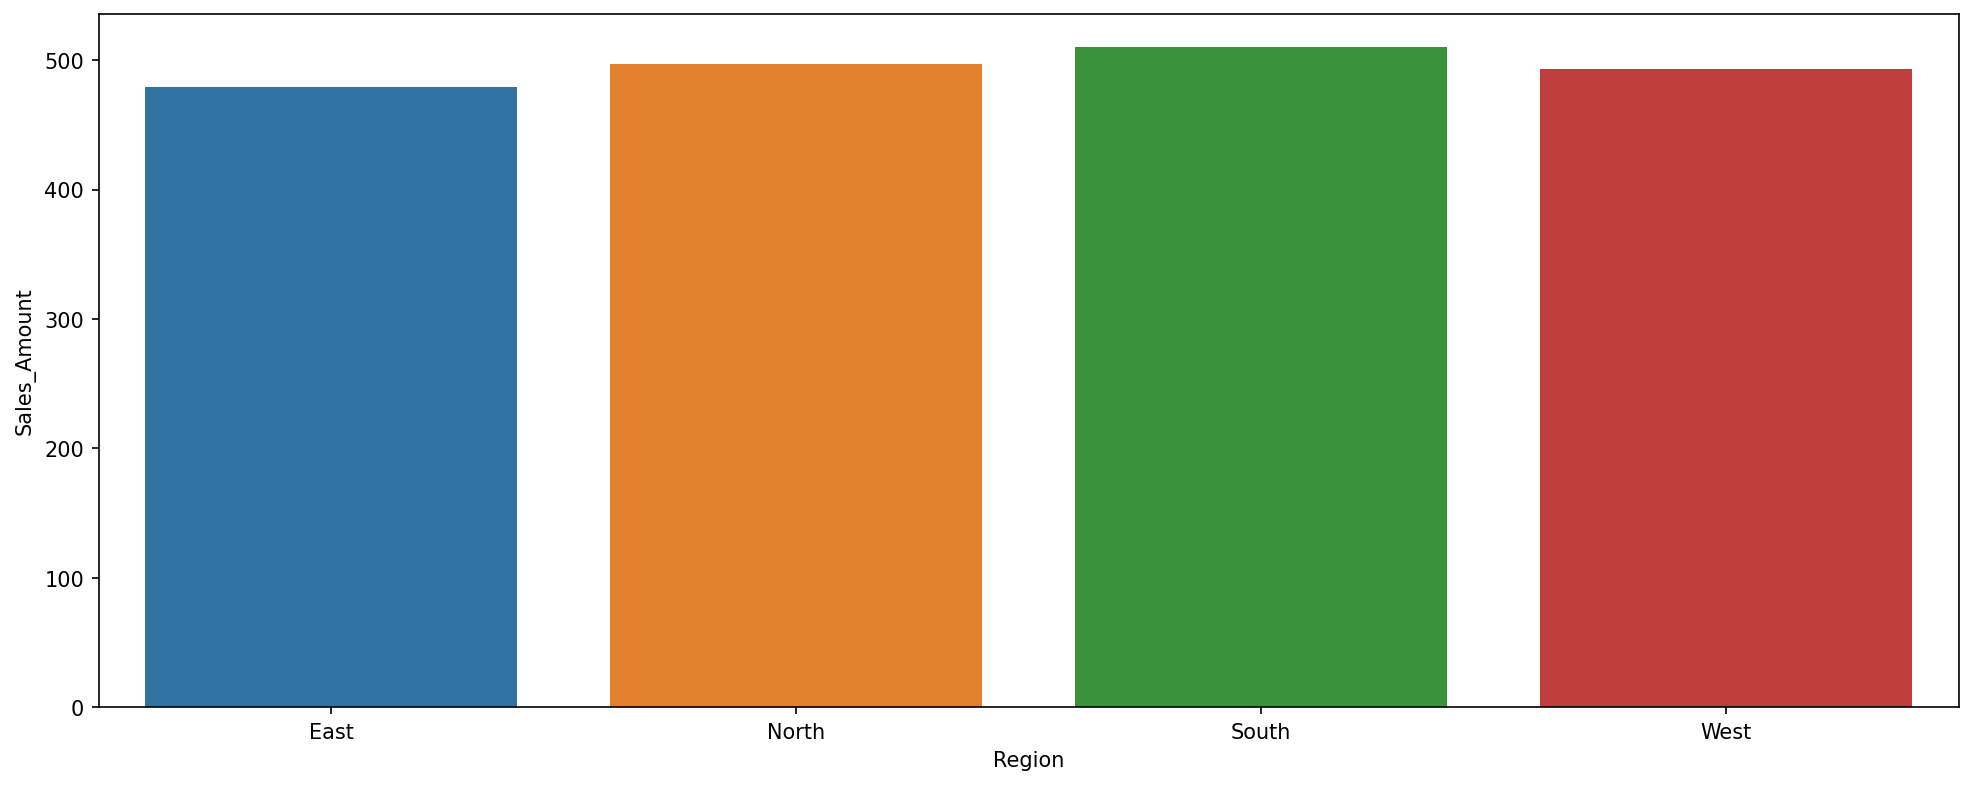

In [5]:
plt.figure(figsize=(16, 6), dpi=150)
sns.barplot(data=df_grouped, x=df_grouped.index, y=df_grouped['Sales_Amount'], hue=df_grouped.index)

plt.show()

Group by Customer_Segment and Region together, then find the total Sales_Amount and average Discount_Percent.

In [6]:
df.head()

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region
Date,,,,,,
2025-01-01,549.671415,17.547461,Returning,S003,True,North
2025-01-02,486.173570,14.815372,New,S004,False,South
2025-01-03,564.768854,13.940315,Loyal,S003,True,North
2025-01-04,652.302986,14.049682,New,S003,True,South
2025-01-05,476.584663,7.189823,New,S001,True,East


In [10]:
df_by_cusotmer = df.groupby(['Customer_Segment', 'Region']).agg({
    'Sales_Amount': 'sum',
    'Discount_Percent': 'mean'
})

df_by_cusotmer

Sales_Amount  Discount_Percent
Customer_Segment Region                                
Loyal            East     9987.598159          8.679220
                 North    6500.498874          9.116622
                 South    7509.434801         10.595448
                 West     4781.314258          8.417851
New              East     8536.795039          8.907056
                 North   11164.640627          9.969695
                 South   10987.846210          8.476899
                 West     7275.331786         11.786399
Returning        East     4005.038243         11.058952
                 North    9690.037685         12.622432
                 South   11089.930104         11.594444
                 West     7656.114909          7.261613

In [16]:
df_reset = df_by_cusotmer.reset_index()
df_reset

,Customer_Segment,Region,Sales_Amount,Discount_Percent
0,Loyal,East,9987.598159,8.679220
1,Loyal,North,6500.498874,9.116622
2,Loyal,South,7509.434801,10.595448
3,Loyal,West,4781.314258,8.417851
4,New,East,8536.795039,8.907056
5,New,North,11164.640627,9.969695
6,New,South,10987.846210,8.476899
7,New,West,7275.331786,11.786399
8,Returning,East,4005.038243,11.058952
9,Returning,North,9690.037685,12.622432


<Axes: xlabel='Region', ylabel='Discount_Percent'>

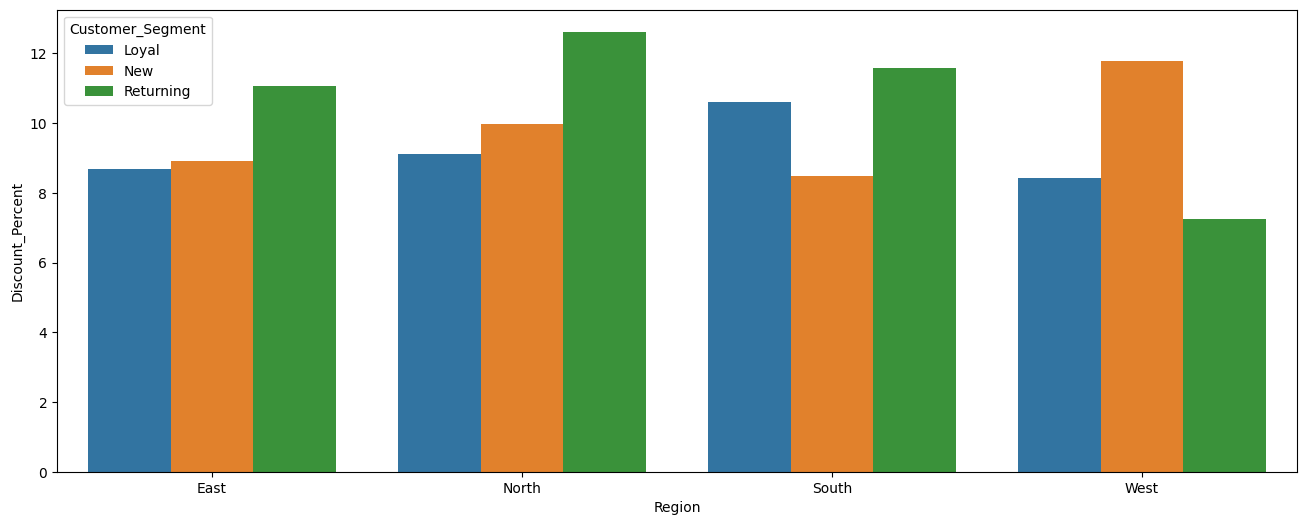

In [29]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_reset, x='Region', y='Discount_Percent', hue='Customer_Segment')

In [30]:
df_mod = df_by_cusotmer['Sales_Amount'].unstack(level='Region')
df_mod

Region,East,North,South,West
Customer_Segment,,,,
Loyal,9987.598159,6500.498874,7509.434801,4781.314258
New,8536.795039,11164.640627,10987.846210,7275.331786
Returning,4005.038243,9690.037685,11089.930104,7656.114909


<Axes: xlabel='Customer_Segment', ylabel='East'>

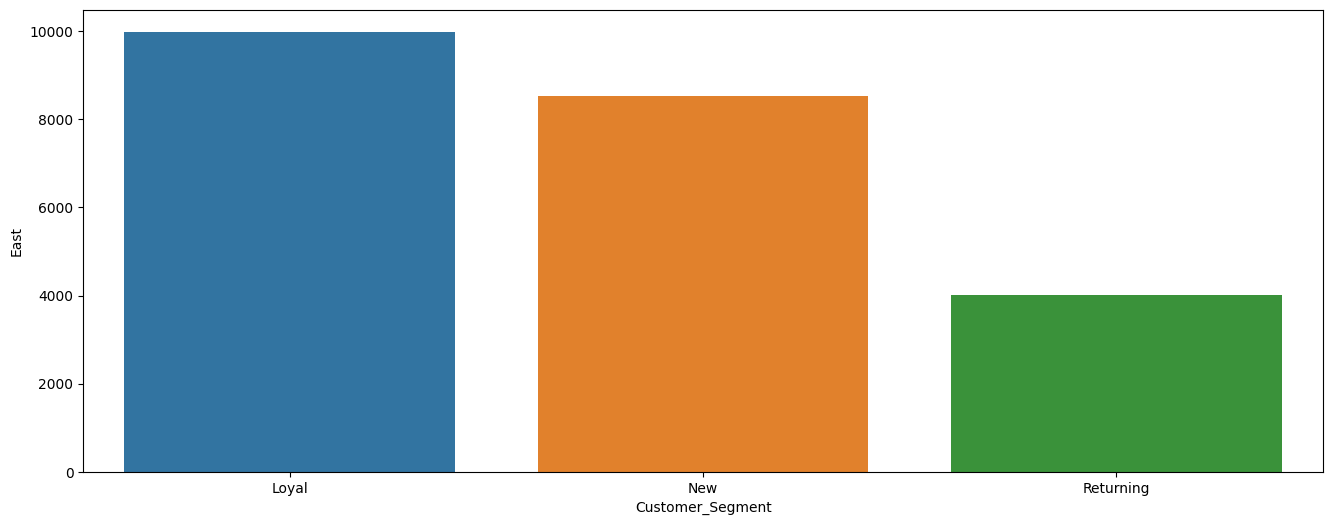

In [38]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_mod, x='Customer_Segment', y='East', hue='Customer_Segment')

Bonus: Add a filter to include only rows where Promotion_Active is True before grouping.

In [39]:
df[df['Promotion_Active']].groupby(['Customer_Segment', 'Region']).agg({
    'Sales_Amount': 'sum',
    'Discount_Percent': 'mean'
})

Sales_Amount  Discount_Percent
Customer_Segment Region                                
Loyal            East     7550.354612          9.888648
                 North    4877.404318         10.123201
                 South    3061.422322         12.132326
                 West     3857.142521          7.053894
New              East     6501.263884          9.635720
                 North    4037.716572         11.672366
                 South    6131.720276          7.805903
                 West     4449.335168         11.765458
Returning        East     1911.575554         13.114003
                 North    5822.622838         12.154320
                 South    8149.092640         11.215703
                 West     5872.002151          5.598960

Resample df to monthly frequency ('ME') and sum Sales_Amount for all regions.

In [67]:
monthly_sales = df.resample('ME').agg({
    'Sales_Amount': 'sum'
})
monthly_sales

# As output we got series, not DataFrame, because only one column

,Sales_Amount
Date,
2025-01-31,14875.388651
2025-02-28,13599.128738
2025-03-31,15636.208830
2025-04-30,14939.245120
2025-05-31,15240.174938
2025-06-30,15873.877315
2025-07-31,9020.557104


In [59]:
# Convert Series to DataFrame
monthly_sales_df = monthly_sales.to_frame().reset_index()
monthly_sales_df

,Date,Sales_Amount
0,2025-01-31,14875.388651
1,2025-02-28,13599.128738
2,2025-03-31,15636.208830
3,2025-04-30,14939.245120
4,2025-05-31,15240.174938
5,2025-06-30,15873.877315
6,2025-07-31,9020.557104


In [68]:
# Convert Series to DataFrame
montly_sales_drop = monthly_sales.reset_index()
montly_sales_drop

,Date,Sales_Amount
0,2025-01-31,14875.388651
1,2025-02-28,13599.128738
2,2025-03-31,15636.208830
3,2025-04-30,14939.245120
4,2025-05-31,15240.174938
5,2025-06-30,15873.877315
6,2025-07-31,9020.557104


In [69]:
# If data is Series, only one row, direct access to the members
# data = pd.DataFrame({
#     'Date': monthly_sales.index,
#     'Sales_Amount': monthly_sales.values
# })

data = pd.DataFrame({
    'Date': montly_sales_drop['Date'],
    'Sales_Amount': montly_sales_drop['Sales_Amount']
})

In [70]:
data

,Date,Sales_Amount
0,2025-01-31,14875.388651
1,2025-02-28,13599.128738
2,2025-03-31,15636.208830
3,2025-04-30,14939.245120
4,2025-05-31,15240.174938
5,2025-06-30,15873.877315
6,2025-07-31,9020.557104


<Axes: xlabel='Date', ylabel='Sales_Amount'>

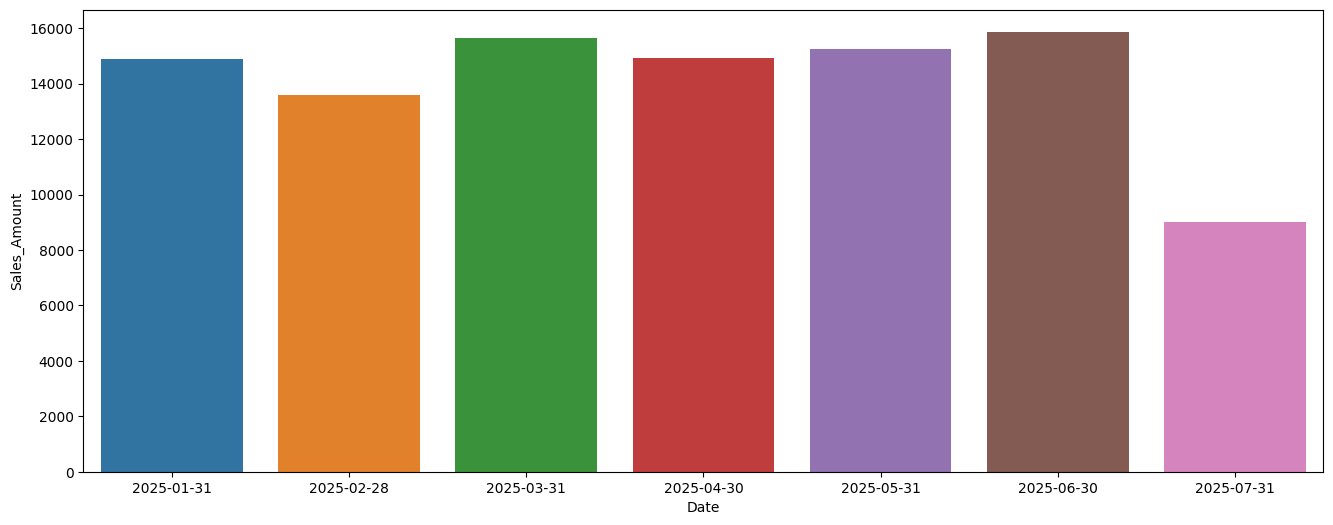

In [71]:
plt.figure(figsize=(16, 6))
sns.barplot(data=data, x='Date', y='Sales_Amount', hue='Date')

Resample by quarter ('Q') and calculate the mean Discount_Percent.

In [73]:
df_quarterly = df.resample('QE').agg({
    'Discount_Percent': 'mean'
})
df_quarterly

,Discount_Percent
Date,
2025-03-31,9.745845
2025-06-30,10.162851
2025-09-30,9.650130


In [74]:
df_quarterly = df_quarterly.reset_index()
df_quarterly

,Date,Discount_Percent
0,2025-03-31,9.745845
1,2025-06-30,10.162851
2,2025-09-30,9.650130


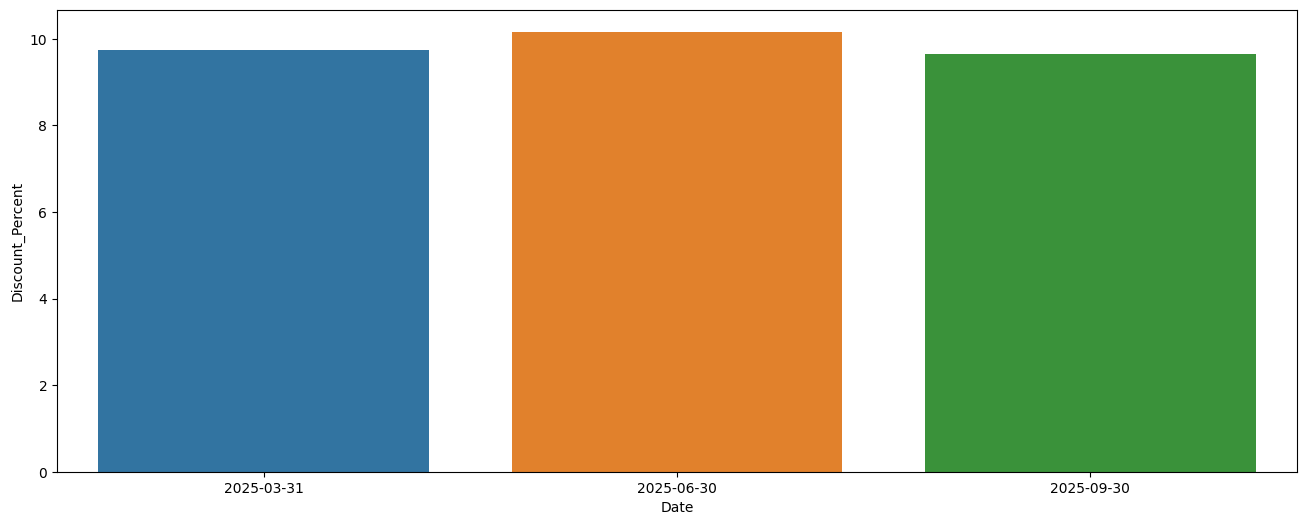

In [86]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_quarterly, x='Date', y='Discount_Percent', hue='Date')

plt.show()

Bonus: Create a new column Total_Sales (Sales_Amount * (1 - Discount_Percent/100)) and resample it monthly.

In [94]:
df.columns

Index(['Sales_Amount', 'Discount_Percent', 'Customer_Segment', 'Store_ID',
       'Promotion_Active', 'Region'],
      dtype='object')

In [97]:
df['Total_Sales'] = df['Sales_Amount'] * (1 - df['Discount_Percent'] / 100)
df.head(2)

,Sales_Amount,Discount_Percent,Customer_Segment,Store_ID,Promotion_Active,Region,Total_Sales
Date,,,,,,,
2025-01-01,549.671415,17.547461,Returning,S003,True,North,453.218036
2025-01-02,486.173570,14.815372,New,S004,False,South,414.145145


In [104]:
total_sales_resampled_qe = df.resample('QE').agg({
    'Total_Sales': 'sum'
})

# total_sales_resampled_qe

In [105]:
total_sales_resampled = df.resample('ME')['Total_Sales'].sum()
# total_sales_resampled

In [103]:
df_by_cusotmer = df.groupby(['Customer_Segment', 'Region']).agg({
    'Sales_Amount': 'sum',
    'Discount_Percent': 'mean'
})

In [106]:
df_mod = df_by_cusotmer['Sales_Amount'].unstack(level='Region')
# df_mod